# Sistemas lineares

* Condicionamento de matriz

https://www.ufrgs.br/reamat/CalculoNumerico/livro-py/sdsl-condicionamento_de_sistemas_lineares.html

## Condicionamento de uma matriz

In [130]:
import numpy as np
A1 = np.array( [ [71, 41], [51, 30] ] )

b1 = np.array( [100.0, 70.0] )
b2 = b1 + [0.4, -0.7]

x1 = np.linalg.solve(A1,b1)
x2 = np.linalg.solve(A1,b2)

erro_entrada = np.linalg.norm(b2 - b1)/np.linalg.norm(b1)
erro_saida = np.linalg.norm(x2 - x1)/np.linalg.norm(x1)

print(x1, '\n',x2, '\n Erro na entrada: ', erro_entrada, '\n Erro na saida: ', erro_saida)

A2 = np.array( [ [71, 41], [52, 30] ] )

x1 = np.linalg.solve(A2,b1)
x2 = np.linalg.solve(A2,[b2])

erro_saida = np.linalg.norm(x2 - x1)/np.linalg.norm(x1)

print(x1, '\n',x2, '\n Erro na entrada: ', erro_entrada, '\n Erro na saida: ', erro_saida)

[ 3.33333333 -3.33333333] 
 [ 4.37692308 -5.13076923] 
 Erro na entrada:  0.006604858898858179 
 Erro na saida:  0.44090077242420717
[-65. 115.] 
 [-85.35 150.25] 
 Erro na entrada:  0.006604858898858179 
 Erro na saida:  0.3081216780451774


Analise o que aconteceu no exemplo anterior:

Uma pequena variação na entrada ($b$) produziu uma grande diferença no valor de $x$.

Nestes casos, dizemos que o sistema é **mal condicionado**.

Considere um sistema linear:

$Ax = y$

Suponha que tenhamos um erro na entrada de $\delta_x$, então teremos:

$A(x + \delta_x) = y + \delta_y$, onde $\delta_y$ é o erro associado à $\delta_x$. 

Teremos então que:

$A\delta_x = \delta_y$

Estamos interessados em relacionar o erro relativo em $x$ e o erro relativo em $y$:

$
\dfrac{\lVert \delta_x \rVert / \lVert x \rVert }{\lVert \delta_y \rVert / \lVert y \rVert }
$

Sabendo que:

$
\lVert \delta_x \rVert = \lVert A^{-1}\delta_y \rVert 
$ e

$
\lVert y \rVert = \lVert Ax \rVert 
$ 

temos que:

$
\dfrac{\lVert \delta_x \rVert / \lVert x \rVert }{\lVert \delta_y \rVert / \lVert y \rVert } \leq 
\lVert A \rVert \cdot \lVert A^{-1} \rVert
$


O número de condicionamento de uma matriz é definido como:

$
Cond(A) = \lVert A \rVert \cdot \lVert A^{-1} \rVert
$

e está relacionado à sensibilidade a variações de uma matriz, ou seja, como os erros de arredondamento se propagam de forma mais ou menos relevante.

In [23]:
import numpy as np

A2 = np.array( [ [71, 41], [52, 30] ] )

# calculando o número de condicionamento de uma matriz:
print(np.linalg.cond(A2))
print(np.linalg.norm(A2) * np.linalg.norm(np.linalg.inv(A2)))

# existem diferentes fórmulas para calcular a norma:
print('Existe mais de uma forma de definir a norma: ', np.linalg.cond(A2, p=np.inf))

A3 = np.array( [ [1, 2], [5, 0] ] )

# uma matriz bem condicionada possui um valor baixo de condicionamento:
print(f'Exemplo de matriz bem condicionada: {np.linalg.cond(A3):.3f}')

5162.9998063135145
5162.999999999844
Existe mais de uma forma de definir a norma:  6887.999999999792
Exemplo de matriz bem condicionada: 2.618


In [2]:
import numpy as np

A2 = np.array( [ [2, -30], [52, 30] ] )
print(np.linalg.cond(A2))

2.3587654636089206


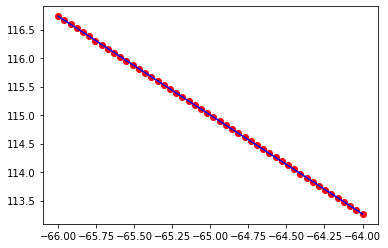

In [153]:
import matplotlib.pyplot as plt

A2 = np.array( [ [71, 41], [52, 30] ] )

b1 = np.array( [100.0, 70.0] )

X1 = np.linspace(-66,-64)
Y1 = (b1[0] - A2[0,0]*X1)/A2[0,1] 
Y2 = (b1[1] - A2[1,0]*X1)/A2[1,1]

plt.plot(X1,Y1, 'or')
plt.plot(X1,Y2, '-b')

Observe que em uma matriz mal condicionada, as retas que definem o sistema linear estão praticamente sobrepostas.